<a href="https://colab.research.google.com/github/kelngu/python-for-math/blob/main/Notebook%20%235/P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Import Libraries: 

In [2]:
import math 
import numpy as np # First we have to load the package.
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time
from decimal import Decimal
from PIL import Image, ImageDraw # Load the package.

## Repetition and benchmarking



Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [34]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [35]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [36]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [37]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [38]:
import numpy as np # First we have to load the package.

In [39]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [40]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [41]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [42]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [43]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [44]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 99.5 µs per loop


In [45]:
%timeit make_sq_2(1000)

10000 loops, best of 5: 76.2 µs per loop


In [46]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 62.7 µs per loop


In [47]:
%timeit make_sq_4(1000)

The slowest run took 15.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.97 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

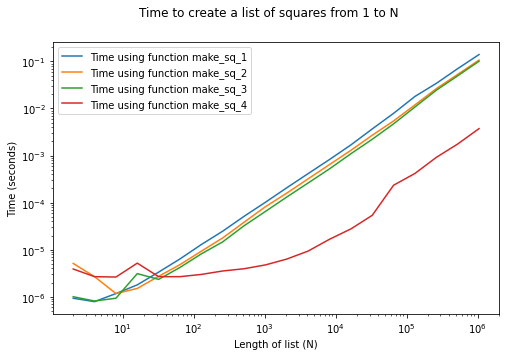

In [49]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises



1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

## Solutions:

### Question #1: 

Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

The plot shows that `make_sq_4` seems to be the fastest method to produce a long list of squares while `make_sq_3` is the fastest method to produce a short lists of squares. Based on the plot, we should switch from one method to the other at size around `N=14` or 'N=15' because from that point and beyond, the plot makes it apparent that `make_sq_4` is the best method to produce a list of squares quickly compared to the other methods. If we were looking to produce a list that is less than `N=14`, but still want the fastest possible method to do so, `make_sq_3` is the best option to produce a list of squares quickly for a lists that are less than `N=14`. A big note is that `make_sq_3` is barely faster than `make_sq_1` or `make_sq_2`, so ultimately for lists smaller than `N=14`, using either `make_sq_1`, `make_sq_2`, or `make_sq_3` would work well and as fast, but beyond `N=14`, users should switch to `make_sq_4` to create that list of squares.  

### Question #2: 

Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

In [29]:
make_sq_5(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [30]:
def make_sq_5(N): 
  return np.square(range(N))

In [31]:
%timeit make_sq_5(1000)

10000 loops, best of 5: 125 µs per loop


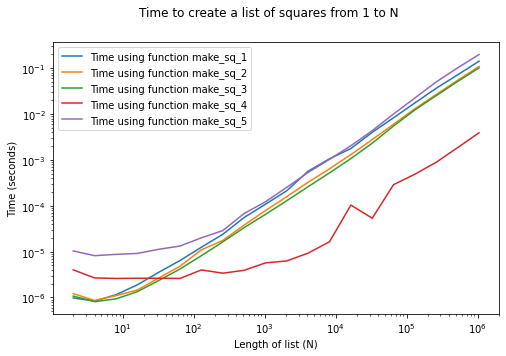

In [33]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4,make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

I create function `make_sq_5`, which fairly similar to `make_sq_3`, except I used the command `np.square` to produce my list of squares. It appears as though `make_sq_5` starts off the slowest compared to all of the functions, until it reaches past `N=23` that the time is comparable to the function `make_sq_1`. `make_sq_5` will not reach the same time speed as `make_sq_4` since `make_sq_4` utilizes a quicker `if` loop that makes the function move a bit faster. But `make_sq_5` has similar time speeds to `make_sq_1`, showing that the way we structure our function can determine how fast the function runs and could make a difference when `N` increases. 

### Question #3: 

Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

In [ ]:
def inflate(S):                         # takes string input S & returns string
                                        # with 1st letter of S appears once, & 
                                        # the second letter appears twice, & 
                                        # third letter appears three times, etc.             
  string = ''         
  for j,letter in enumerate(S):
    string += (letter * (j+1))          # for each letter of string, multiplies 
                                        # letter with the current placement
  return string

In [ ]:
inflate('Hello')

'Heelllllllooooo'

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

## Please Grade These: 

### Challenge 3:
 

#### Challenge Problem: 


The following result was found by Euler, but I've changed his numbers to $A$ and $B$ to make your life hard.

Theorem:  A prime number $p$ can be expressed in the form $x^2 + 3 y^2$ if and only if $p$ is congruent to $A$ modulo $B$ (i.e., `p % B == A`).  

Use experimental techniques to determine $A$ and $B$.  Now try the same for $3$ replaced by $4,5,6,7,8,9$.

#### Main Script to Determine Values of `(A,B)` Such That Theorem is True: 

Euler theorized that "A prime number $p$ can be expressed in the form $x^2 + n y^2$ such that $n = \{ x \in \mathbb{N} : 3 \leq x \leq 9\}$ if and only if $p$ is congruent to $A$ modulo $B$. To determine the values for $A$ and $B$, we have to first determine all of the prime numbers with a range that satisfies the equation $x^2 + n y^2$ before deciding which pairing of $[A,B]$ will make the prime number be congruent to $A$ modulo $B$. 

Suppose we want to first explore this theorem when $n=3$. The script below asks for two inputs: p = range of `(1,p)` and `n` in the equation $x^2 + n y^2$. Based on the two inputs, the function checks whether `n` is greater than 3, but less than 9, only because that is the parameters we are asked to look into, (if we were to look for a wide range of `n` values, then the only parameter needed is the fact that `n` is greater than 3), and `p` is a positive integer.  

From there, the function goes through all of the values between 1 and the prime and produces a list of primes within that range. That initial list then goes through another loop that determines whether the prime number in that initial list can be expressed in the form $x^2 + 3y^2$, which should narrow the list of initial primes to a list of $x^2 + 3y^2$. 

This then satisfies the first part of the if and only if statement, which leads us to finding the values of $A$ and $B$. We first found the pairings of $[A,B]$ of the smallest prime number because we know that the pairing of $[A,B]$ of the smallest prime number that satisfies $x^2 + n y^2$ can potentially be used for all of the prime numbers that satisfy $x^2 + n y^2$. This is helpful so that we do not have to look through a large list of $[A,B]$ pairings from a very large numbers. 

The $[A,B]$ pairing we found for the smallest prime number that satisfies $x^2 + n y^2$ is then set as the range for the next prime number number on the list, From that first initial $[A,B]$ pairing that we found, the second prime number on the list should narrow that first initial $[A,B]$ pairing list down even more. This portion of the tests is meant is for us to narrow the $[A,B]$ pairing
list down so that eventually, we get a $[A,B]$ pairing list that works for every number on the prime numbers list that satisfies $x^2 + n y^2$. 

We run this $[A,B]$ pairing with two more prime numbers to narrow the list down even more and to confirm if that lists works. If that list works, then we have found the $[A,B]$ pairing. 

In summary, the function first determines all of the prime numbers that satisfy the equation $x^2 + n y^2$ and from that list of prime numbers is when the function determines the $[A,B]$ pairing. We first find the $[A,B]$ pairing of the smallest number in that prime numbers list that satisfy the equation $x^2 + n y^2$ before narrowing the $[A,B]$ pairings down with the other three numbers in the prime numbers list. By this point, the $[A,B]$ pairings should be narrowed down enough such that we could conclude that the $[A,B]$ pairings will work as part of the overall theorem.  

In [ ]:
# count primes from 1 to p, determines primes that satisfy square equation, finds (A,B) st p is equiv to A mod B 
def prime_np(p,n):                  
  # p = int(input('Enter a number P in the range of (1,p): '))                  ## having p and n as open inputs allows user choose any arguments without being limited 
  # n = int(input('Enter a number n, where x^2 + ny^2: '))
  
  original_p = p
  isprime = []
  isNOTprime = [] 
  x_y = []
  x_y_not = []
  A_pair0 = []
  B_pair0 = []
  A_pair1 = []
  B_pair1 = []
  A_pair2 = []
  B_pair2 = []
  A_pair3 = []
  B_pair3 = []
  primemod = [] 

  if n < 3 or n > 9: 
    raise ValueError('Your value should be greater than 3, but less than 9.')

  if p < 1: 
    raise ValueError('Your value p should be greater than 1.')
  
  if type(p) == float: 
    raise TypeError('Your value p is not an integer.')

  while p != 0:
    if p == 1: 
      isNOTprime.append(p) 
      break      
    ran = int(p/2) + 1 
    for i in range(2,ran):            # check if divisible, only need to check up to 
      if p % i == 0: 
        isNOTprime.append(p) 
        break
    else: 
      isprime.append(p)
    p -= 1

  prime_count = len(isprime)
  NOTprime_count =  len(isNOTprime)

  for prime in isprime:
    for x in range (1,original_p + 1):
      for y in range (1,original_p + 1):
        if prime == pow(x,2) + (n * pow(y,2)):
          x_y.append(prime)
          break  

  x_y.reverse()

  if len(x_y) == 0: 
    return print('From the list of {} prime numbers in the range from 1 to {}, there are no values of x and y such that equation is satisfied.'.format(prime_count,original_p))  
  else: 
    print('From the list of {} prime numbers in the range from 1 to {}, there are {} prime numbers that satisfies the equation x^2 + {}y^2: \n {} \n '.format(prime_count,original_p,len(x_y), n, x_y))

  # test first number 
  prim0 = x_y[0] 
  for A in range(1,prim0+1):
    for B in range(1,prim0+1): 
      if prim0 % B == A:  
        A_pair0.append(A)
        B_pair0.append(B)
  
  AB_prim0 = list(zip(A_pair0,B_pair0))
  
  # test second number 
  prim1 = x_y[1]
  for A,B in AB_prim0:
    if prim1 % B == A:
        A_pair1.append(A)
        B_pair1.append(B)
  
  AB_prim1 = list(zip(A_pair1,B_pair1))

  # test third number 
  prim2 = x_y[2]
  for A,B in AB_prim1:
    if prim2 % B == A:
        A_pair2.append(A)
        B_pair2.append(B)

  AB_prim2 = list(zip(A_pair2,B_pair2))

  # test fourth number 
  prim3 = x_y[3]
  for A,B in AB_prim2:
    if prim3 % B == A:
        A_pair3.append(A)
        B_pair3.append(B)

  AB_prim3 = list(zip(A_pair3,B_pair3))

  # test all numbers
  for allprime in x_y:
    for A,B in AB_prim3:
      if allprime % B == A: 
        break
    primemod.append(allprime)

  if len(primemod) != len(x_y):
    print('An error was found.')
  else: 
    print('With those {} prime numbers, we found {} pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: \n {} \n'.format(len(x_y),len(AB_prim3),AB_prim3))
    print('Therefore we have the following theorem based on Eulers findings: \n A prime number p can be expressed in the form x^2 + {}y^2 if and only if p is congruent to A modulo B such that [A,B] = {}. \n'.format(n,AB_prim3))

#### Values of pairing `(A,B)` such that a prime number p can be expressed in the form of $x^2 + ny^2$, where $n = \{ x \in \mathbb{N} : 3 \leq x \leq 9\}$, if and only if p $\equiv$ A $mod$ B:


Listed below are the $[A,B]$ pairings for when $n = 3,4,5,6,7,8,9$, using the function `prime_np(p,n)`, where `p` is the last number in the range from `1` to `p` and `n` is the number from the equation $x^2 + ny^2$. 

In [ ]:
prime_np(100,3)

From the list of 25 prime numbers in the range from 1 to 100, there are 11 prime numbers that satisfies the equation x^2 + 3y^2: 
 [7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97] 
 
With those 11 prime numbers, we found 3 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 3), (1, 6)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 3y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 3), (1, 6)]. 



In [ ]:
prime_np(100,4)

From the list of 25 prime numbers in the range from 1 to 100, there are 11 prime numbers that satisfies the equation x^2 + 4y^2: 
 [5, 13, 17, 29, 37, 41, 53, 61, 73, 89, 97] 
 
With those 11 prime numbers, we found 2 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 4)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 4y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 4)]. 



In [ ]:
prime_np(100,5)

From the list of 25 prime numbers in the range from 1 to 100, there are 4 prime numbers that satisfies the equation x^2 + 5y^2: 
 [29, 41, 61, 89] 
 
With those 4 prime numbers, we found 2 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 4)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 5y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 4)]. 



In [ ]:
prime_np(100,6)

From the list of 25 prime numbers in the range from 1 to 100, there are 5 prime numbers that satisfies the equation x^2 + 6y^2: 
 [7, 31, 73, 79, 97] 
 
With those 5 prime numbers, we found 3 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 3), (1, 6)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 6y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 3), (1, 6)]. 



In [ ]:
prime_np(100,7)

From the list of 25 prime numbers in the range from 1 to 100, there are 9 prime numbers that satisfies the equation x^2 + 7y^2: 
 [11, 23, 29, 37, 43, 53, 67, 71, 79] 
 
With those 9 prime numbers, we found 1 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 7y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2)]. 



In [ ]:
prime_np(100,8)

From the list of 25 prime numbers in the range from 1 to 100, there are 5 prime numbers that satisfies the equation x^2 + 8y^2: 
 [17, 41, 73, 89, 97] 
 
With those 5 prime numbers, we found 3 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 4), (1, 8)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 8y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 4), (1, 8)]. 



In [ ]:
prime_np(100,9)

From the list of 25 prime numbers in the range from 1 to 100, there are 5 prime numbers that satisfies the equation x^2 + 9y^2: 
 [13, 37, 61, 73, 97] 
 
With those 5 prime numbers, we found 5 pairing(s) of [A,B] such that the pairing(s) satisfy the fact that p is congruent to A modulo B: 
 [(1, 2), (1, 3), (1, 4), (1, 6), (1, 12)] 

Therefore we have the following theorem based on Eulers findings: 
 A prime number p can be expressed in the form x^2 + 9y^2 if and only if p is congruent to A modulo B such that [A,B] = [(1, 2), (1, 3), (1, 4), (1, 6), (1, 12)]. 



1


### Challenge 4:



#### Challenge Problem: 


Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.

#### Representing Modulo 2 of Pascal Triangle Coefficients with Black & White Dots:

I start off with a black square, and from there, every odd number that the function detects will be plotted onto that black square with a white dot. To create the overall black and white image, for each coefficient of the Pascal Triangle, I determined whether those values are odd or even using Modulo 2. If the remainder is 1, then that value is odd and will be drawn onto the `tri` black square as a dot. If the remainder is 0, then the value is even and will be jotted as a black dot onto the square (which may not be as noticeable because the square is already black). Ultimately, we achieve the following image below: (the other triangular half of the image is black because that side of the matrix has values of 0, in which Python reads those values to be even, so that side remains black)

Something to note that the `n` input that I chose was very specific so that we could get a full half view of the triange image. There are some `n` values that create an image that does show a complete half view of the triangle view, where it goes beyond the half triangle line, as shown when `n=1001`, and it simply looks broken/imcomplete. 

In [ ]:
# Pascal function, input n indicates (nxn) matrix and nth row 
def pascal2(n): 
  # start pascal matrix with a nxn matrix of 0
  pascal = np.zeros((n,n))
  pascal[0,:] = np.array([1]*n)
  pascal[:,0] = np.array([1]*n)

  # start tri pic matrix with a nxn matrix with 3 coordinates as black square
  tri = np.zeros((n,n,3), dtype=np.uint8)
  tri[0,:] = (255, 255, 255)
  tri[:,0] = (255, 255, 255)
 
 # calculates value for pascal, value then goes through mod2 loop to see
 # if black or white dot 
  for row in range(1,n):
    for col in range(1,n-row):
      pascal[row,col] = (pascal[row-1,col] + pascal[row,col-1]) % 2
      if pascal[row,col] == 0: 
        tri[row, col] = (0, 0, 0)
      else: 
        tri[row, col] = (255, 255, 255)    

  img = Image.fromarray(tri)
  display(img)

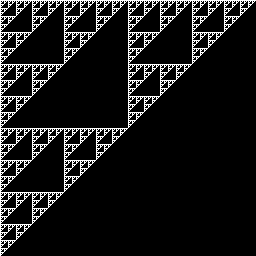

In [ ]:
pascal2(256)

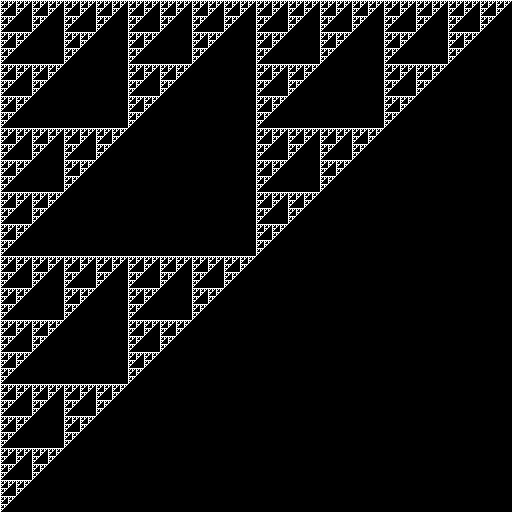

In [ ]:
pascal2(512)

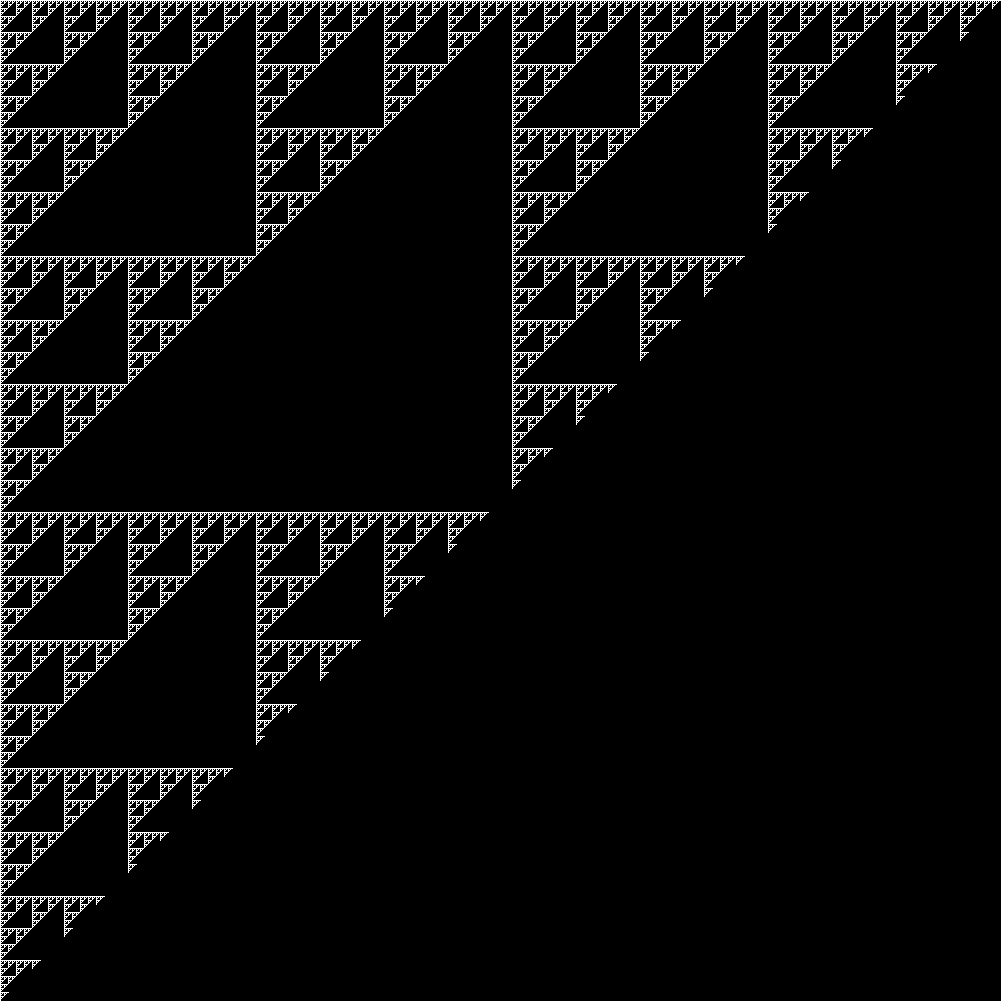

In [ ]:
pascal2(1001)

#### Representing Modulo 3 of Pascal Triangle Coefficients with Black, Blue, & Green Dots

Similar to the previous Modulo 2 section, I began with a black square, and from there, for each coefficient of the Pascal Triangle, if the remainder is 1, then 
a blue dot will drawn, while if the remainder is 2, then a green dot will drawn onto the square. Otherwise, a black dot is drawn onto the `tri` square if the remainder is 0. The other triangular half of the image remains black because that lower side of the matrix all have values of 0. Because Python reads those values to be even, that side remains black. 

In [ ]:
# Pascal function, input n indicates (nxn) matrix and nth row 
def pascal3(n): 
  # start pascal matrix with a nxn matrix of 0
  pascal = np.zeros((n,n))
  pascal[0,:] = np.array([1]*n)
  pascal[:,0] = np.array([1]*n)

  # start tri pic matrix with a nxn matrix with 3 coordinates as black square
  tri = np.zeros((n,n,3), dtype=np.uint8)
  tri[0,:] = (255, 255, 255)
  tri[:,0] = (255, 255, 255)

 # calculates value for pascal, value then goes through mod3 loop to see
 # if black, green, or blue dot 
  for row in range(1,n):
    for col in range(1,n-row):
      pascal[row,col] = (pascal[row-1,col] + pascal[row,col-1]) % 3
      if pascal[row,col] == 0: 
        tri[row, col] = (0, 0, 0)
      elif pascal[row,col] == 1:
        tri[row, col] = (0,0,255)    
      else: 
        tri[row, col] = (0, 255, 0)

  img = Image.fromarray(tri)
  display(img)

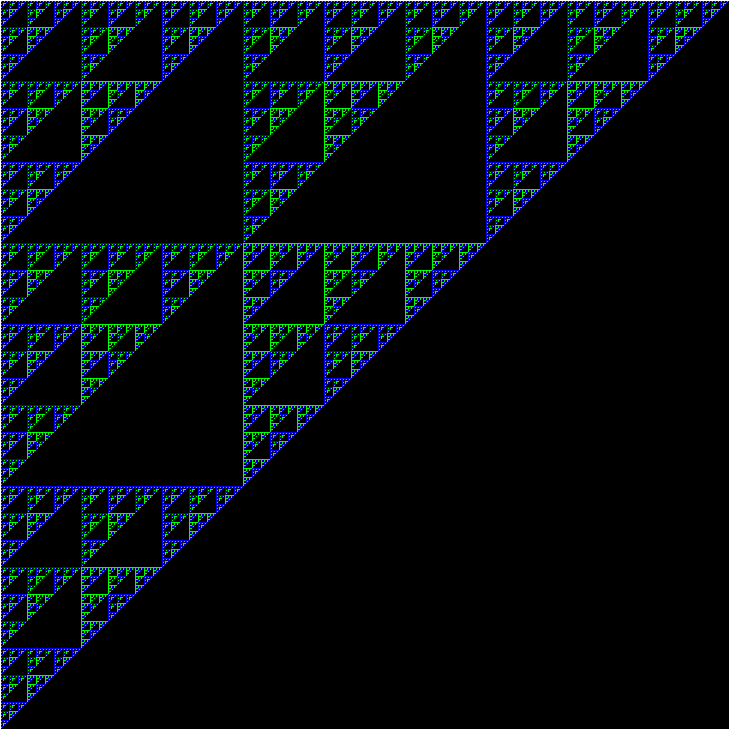

In [ ]:
pascal3(729)

#### Representing Modulo 4 of Pascal Triangle Coefficients with Black, Blue, Green, & Red Dots

From this point and beyond, to achieve an image that represents either modulo 4, modulo 5, or modulo 7 of the Pascal Triangle Coefficients, we would implement the same function as `pascal2(n)`, but would instead add a couple more `if` and `elif` statements to account for other remainders outside of just `1` and `2`. Thus, presented below is the color dot scheme for modulo 4: 


1.   Remainder of 0 = Black
2.   Remainder of 1 = Blue
3.   Remainder of 2 = Red
4.   Remainder of 3 = Green 







In [ ]:
# Pascal function, input n indicates (nxn) matrix and nth row 
def pascal4(n): 
  # start pascal matrix with a nxn matrix of 0
  pascal = np.zeros((n,n))
  pascal[0,:] = np.array([1]*n)
  pascal[:,0] = np.array([1]*n)

  # start tri pic matrix with a nxn matrix with 3 coordinates as black square
  tri = np.zeros((n,n,3), dtype=np.uint8)
  tri[0,:] = (255, 255, 255)
  tri[:,0] = (255, 255, 255)
  
 # calculates value for pascal, value then goes through mod4 loop to see
 # if black, green, red, or blue dot 
  for row in range(1,n):
    for col in range(1,n-row):
      pascal[row,col] = (pascal[row-1,col] + pascal[row,col-1]) % 4
      if pascal[row,col] == 0: 
        tri[row, col] = (0, 0, 0)
      elif pascal[row,col] == 1:
        tri[row, col] = (0,0,255)
      elif pascal[row,col] == 2:
        tri[row, col] = (255,0,0)    
      else: 
        tri[row, col] = (0, 255, 0)

  img = Image.fromarray(tri)
  display(img)

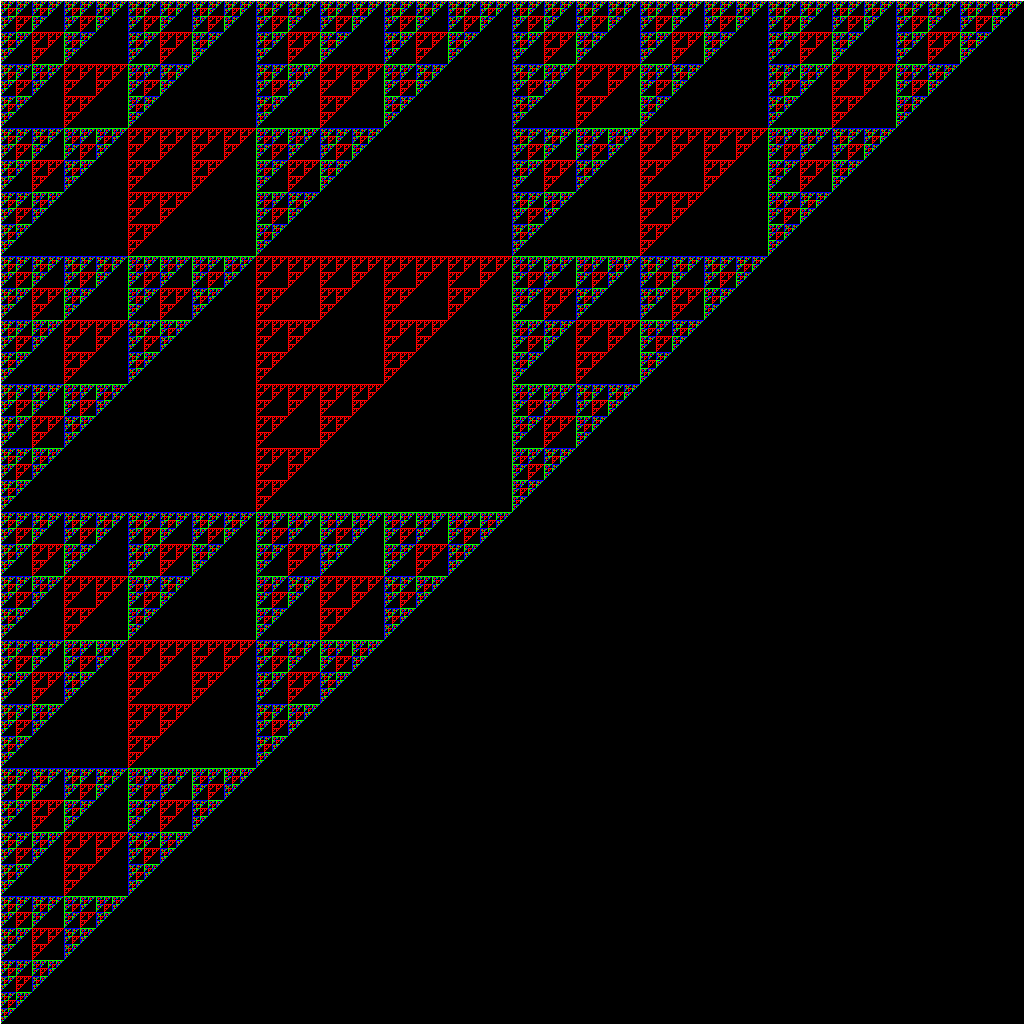

In [ ]:
pascal4(1024)

#### Representing Modulo 5 of Pascal Triangle Coefficients with Black, Blue, Green, Red, & Purple Dots

Presented below is the color dot scheme for modulo 5: 


1.   Remainder of 0 = Black
2.   Remainder of 1 = Blue
3.   Remainder of 2 = Red
4.   Remainder of 3 = Purple 
5.   Remainder of 4 = Green

In [ ]:
# Pascal function, input n indicates (nxn) matrix and nth row 
def pascal5(n): 
  # start pascal matrix with a nxn matrix of 0
  pascal = np.zeros((n,n))
  pascal[0,:] = np.array([1]*n)
  pascal[:,0] = np.array([1]*n)

  # start tri pic matrix with a nxn matrix with 3 coordinates as black square
  tri = np.zeros((n,n,3), dtype=np.uint8)
  tri[0,:] = (255, 255, 255)
  tri[:,0] = (255, 255, 255)
  
 # calculates value for pascal, value then goes through mod5 loop to see
 # if black, green, red, purple, blue dot 
  for row in range(1,n):
    for col in range(1,n-row):
      pascal[row,col] = (pascal[row-1,col] + pascal[row,col-1]) % 5
      if pascal[row,col] == 0: 
        tri[row, col] = (0, 0, 0)
      elif pascal[row,col] == 1:
        tri[row, col] = (0,0,255)
      elif pascal[row,col] == 2:
        tri[row, col] = (255,0,0)
      elif pascal[row,col] == 3:
        tri[row, col] = (255,0,255)    
      else: 
        tri[row, col] = (0, 255, 0)

  img = Image.fromarray(tri)
  display(img)

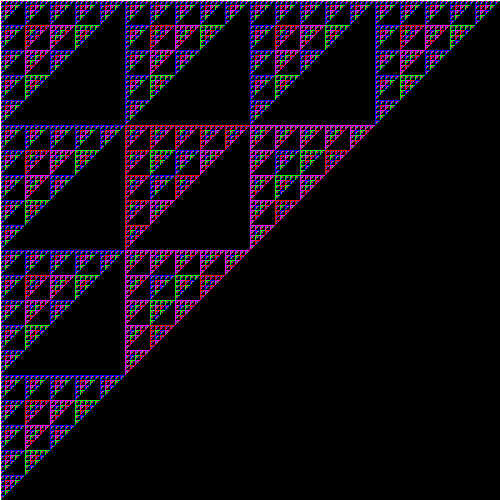

In [ ]:
pascal5(500)

#### Representing Modulo 7 of Pascal Triangle Coefficients with Black, Blue, Green, Red, Purple, Yellow, & Cyan Dots

Presented below is the color dot scheme for modulo 7: 


1.   Remainder of 0 = Black
2.   Remainder of 1 = Blue
3.   Remainder of 2 = Red
4.   Remainder of 3 = Purple 
5.   Remainder of 4 = Cyan
6.   Remainder of 5 = Green
7.   Remainder of 6 = Yellow

In [ ]:
# Pascal function, input n indicates (nxn) matrix and nth row 
def pascal7(n): 
  # start pascal matrix with a nxn matrix of 0
  pascal = np.zeros((n,n))
  pascal[0,:] = np.array([1]*n)
  pascal[:,0] = np.array([1]*n)

  # start tri pic matrix with a nxn matrix with 3 coordinates as black square
  tri = np.zeros((n,n,3), dtype=np.uint8)
  tri[0,:] = (255, 255, 255)
  tri[:,0] = (255, 255, 255)
  
 # calculates value for pascal, value then goes through mod7 loop to see
 # if black, green, red, purple, cyan, blue, or yellow dot 
  for row in range(1,n):
    for col in range(1,n-row):
      pascal[row,col] = (pascal[row-1,col] + pascal[row,col-1]) % 7
      if pascal[row,col] == 0: 
        tri[row, col] = (0, 0, 0)
      elif pascal[row,col] == 1:
        tri[row, col] = (0,0,255)
      elif pascal[row,col] == 2:
        tri[row, col] = (255,0,0)
      elif pascal[row,col] == 3:
        tri[row, col] = (255,0,255)  
      elif pascal[row,col] == 4:
        tri[row, col] = (0,255,255)
      elif pascal[row,col] == 5:
        tri[row, col] = (0,255,0)  
      else: 
        tri[row, col] = (255, 252, 56)

  img = Image.fromarray(tri)
  display(img)

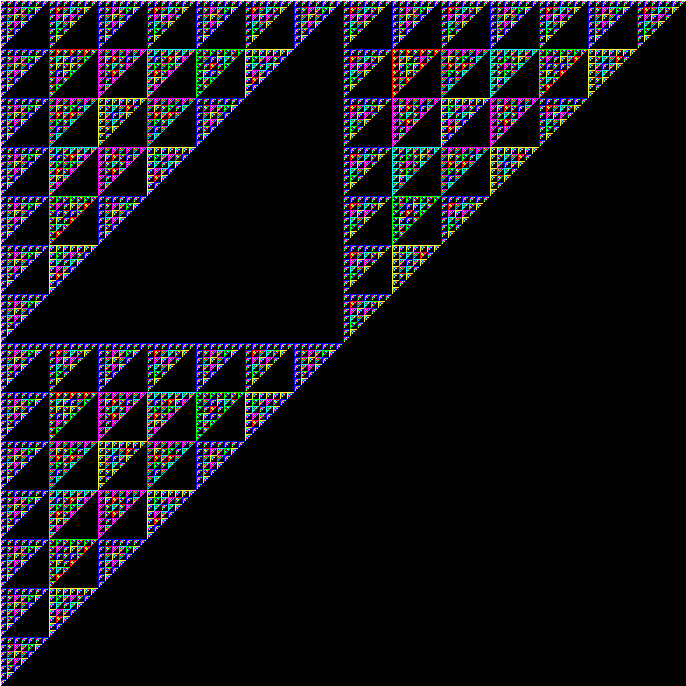

In [ ]:
pascal7(686)

## Please **DON'T** Grade These:


### Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).




In [ ]:
def rep_three(N):
  return R # The result of your function should be R.

In [ ]:
rep_three(6) # This should output 24.

### Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.

### Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [ ]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

x_array = np.arange(300)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [ ]:
# Please use this code to import matplotlib.
import matplotlib.pyplot as plt

In [ ]:
# Here is a plot of the array, to get you started.  
plt.plot(x_array, A)

# Now it's time to write your function to produce the 7-day rolling average, add it to the plot, and make everything clear and labeled.